In [1]:
import re
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv(r"/content/twitter_training.csv")
data.head()

,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
data.columns

Index(['Tweet ID', 'Entity', 'Sentiment', 'Tweet Content'], dtype='object')

In [4]:
data1 = pd.read_csv(r"/content/twitter_validation.csv")
data1.head()

,Tweet ID,Entity,Sentiment,Tweet Content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [5]:
data1.columns

Index(['Tweet ID', 'Entity', 'Sentiment', 'Tweet Content'], dtype='object')

In [6]:
data.shape

(7334, 4)

In [7]:
data1.shape

(1000, 4)

In [8]:
data.info()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7334 entries, 0 to 7333
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       7334 non-null   int64 
 1   Entity         7334 non-null   object
 2   Sentiment      7334 non-null   object
 3   Tweet Content  7250 non-null   object
dtypes: int64(1), object(3)
memory usage: 229.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       1000 non-null   int64 
 1   Entity         1000 non-null   object
 2   Sentiment      1000 non-null   object
 3   Tweet Content  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [9]:
data.isnull().sum()

Tweet ID          0
Entity            0
Sentiment         0
Tweet Content    84
dtype: int64

In [10]:
data1.isnull().sum()

Tweet ID         0
Entity           0
Sentiment        0
Tweet Content    0
dtype: int64

In [11]:
vectorizer = TfidfVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(data["Sentiment"])
X_val = vectorizer.transform(data1["Sentiment"])


model = MultinomialNB(alpha=1.5)
model.fit(X_train, data['Sentiment'])

MultinomialNB(alpha=1.5)

In [12]:
predictions = model.predict(X_val)

from sklearn.metrics import f1_score

f1 = f1_score(data1['Sentiment'], predictions,average='micro')
print(f'F1 Score: {f1:.2f}')

F1 Score: 1.00


In [13]:
print('Classification Report:\n', classification_report(data1['Sentiment'], predictions))
print('Confusion Matrix:\n', confusion_matrix(data1['Sentiment'], predictions))

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       1.00      1.00      1.00       172
    Negative       1.00      1.00      1.00       266
     Neutral       1.00      1.00      1.00       285
    Positive       1.00      1.00      1.00       277

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Confusion Matrix:
 [[172   0   0   0]
 [  0 266   0   0]
 [  0   0 285   0]
 [  0   0   0 277]]


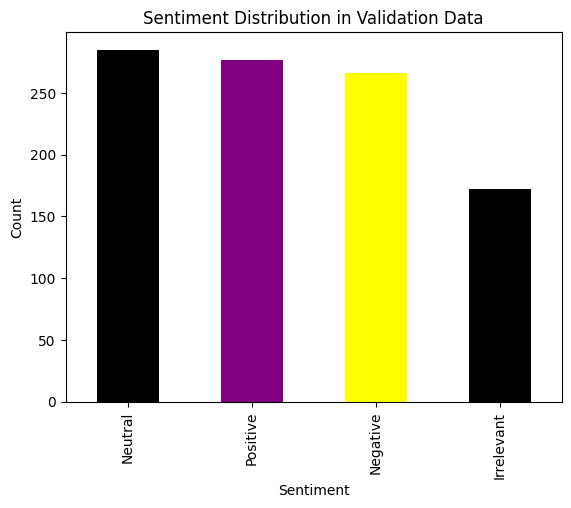

In [14]:
sentiment_distribution = data1['Sentiment'].value_counts()
sentiment_distribution.plot(kind='bar', color=['black', 'purple', 'yellow'])
plt.title('Sentiment Distribution in Validation Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

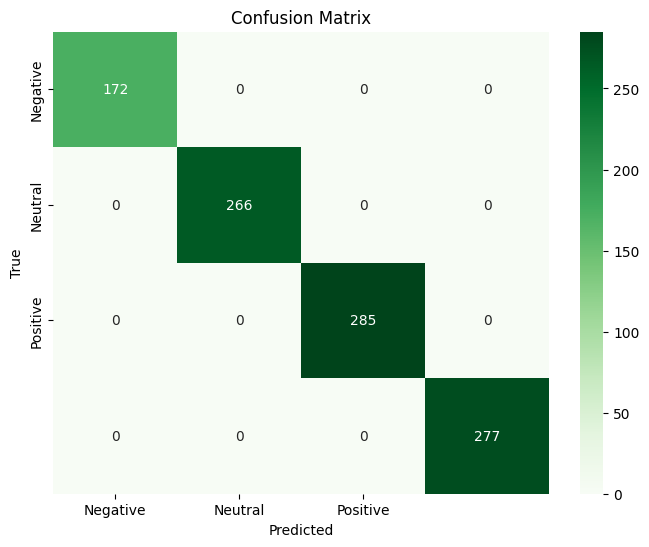

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(data1['Sentiment'], predictions), annot=True, fmt='d', cmap='Greens',
            xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

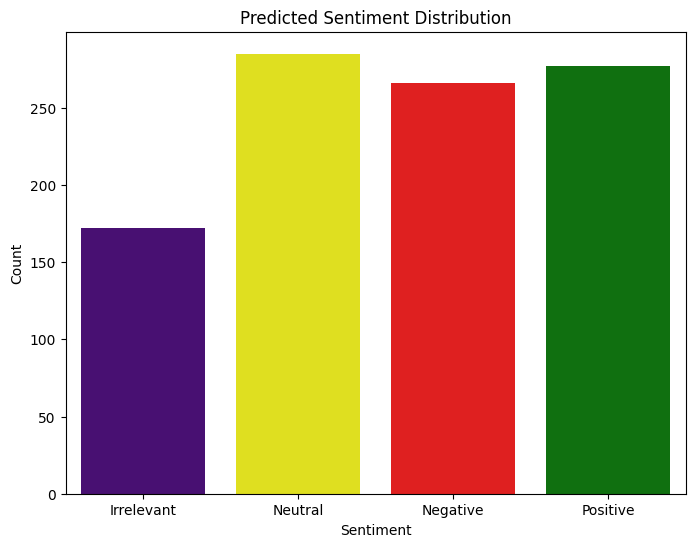

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x=predictions, palette=['indigo', 'yellow', 'red', 'green'])
plt.title('Predicted Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

In [18]:
import nltk
nltk.download('vader_lexicon')

nltk.download('punkt')

nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
import nltk
nltk.data.path.append("C:\\Users\\HP\\nltk_data")
nltk.download('vader_lexicon')

nltk.data.path.append("C:\\Users\\HP\\nltk_data")
nltk.download('punkt')

nltk.data.path.append("C:\\Users\\HP\\nltk_data")
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
sid = SentimentIntensityAnalyzer()
def preprocess_text(text):
    if isinstance(text, str):  # Check if text is a string
        # Tokenize text
        tokens = word_tokenize(text)
        # Remove punctuation
        tokens = [word for word in tokens if word.isalpha()]
        # Convert to lowercase
        tokens = [word.lower() for word in tokens]
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if not word in stop_words]
        return ' '.join(tokens)
    else:
        return ''

In [21]:
data['clean_text'] = data['Tweet Content'].apply(preprocess_text)
data['sentiment_score'] = data['Sentiment'].apply(lambda x: sid.polarity_scores(x)['compound'])

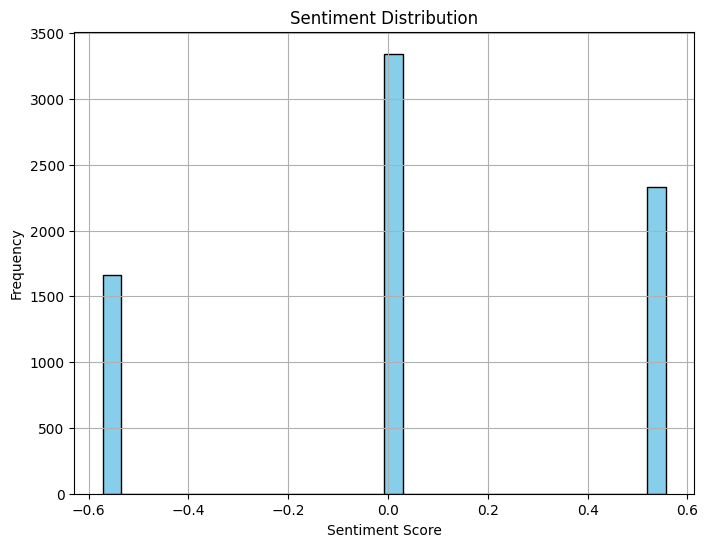

In [22]:
plt.figure(figsize=(8, 6))
plt.hist(data['sentiment_score'], bins=30, color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()